# Probability Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Normal Distribution

A manufacturing company produces a certain type of component, and the **diameter of these components follows a normal distribution** with a **mean diameter of 12 centimeters** and a **standard deviation of 0.5 centimeters**.

What is the **probability** that a **randomly selected component** will have a **diameter between 11.5 centimeters and 12.5 centimeters**?

In [2]:
from scipy.stats import norm

In [3]:
mean_diameter = 12
std_deviation = 0.5
lower_limit = 11.5
upper_limit = 12.5

probability = norm.cdf(upper_limit, mean_diameter, std_deviation) - norm.cdf(lower_limit, mean_diameter, std_deviation)
print("Probability of a randomly selected component having a diameter between 11.5 and 12.5 centimeters:")
print("Probability =", probability)

Probability of a randomly selected component having a diameter between 11.5 and 12.5 centimeters:
Probability = 0.6826894921370859


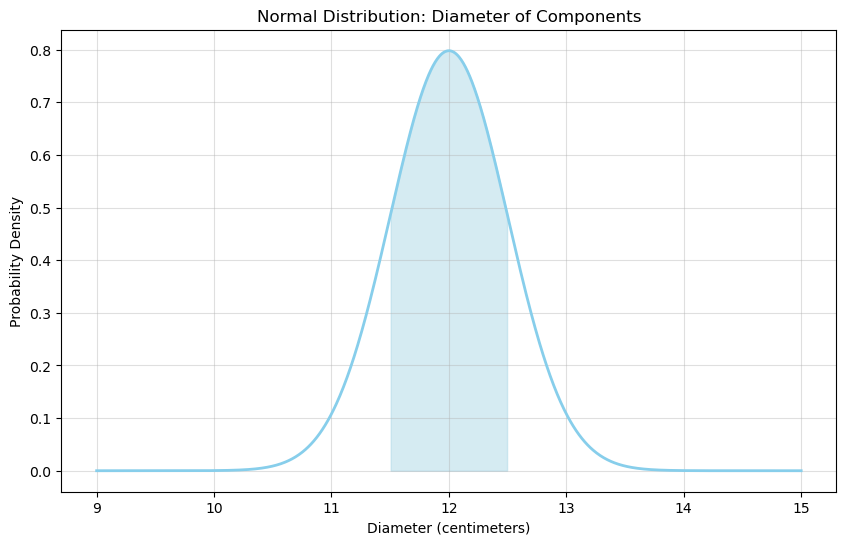

In [4]:
x = np.linspace(9, 15, 1000)  #1000 points from range 9 to 15 

#Graph 
plt.figure(figsize=(10, 6))
pdf = norm.pdf(x, mean_diameter, std_deviation)
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title('Normal Distribution: Diameter of Components')
plt.xlabel('Diameter (centimeters)')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.4)
plt.fill_between(x, pdf, where=((x >= lower_limit) & (x <= upper_limit)), color='lightblue', alpha=0.5)
plt.show()

## Student Ts Distribution

A company is conducting a study on the average commute time of its employees. A **random sample of 15 employees** is selected, and their commute times (in minutes) are recorded. The **sample mean** commute time is found to be **28 minutes**, with a **sample standard deviation of 5 minutes**.

What is the **probability** that the **population mean commute time is greater than 30 minutes**?

In [5]:
from scipy.stats import t

In [6]:
sample_mean = 28
sample_std_deviation = 5
sample_size = 15

population_mean_hypothesis = 30

t_score = (sample_mean - population_mean_hypothesis) / (sample_std_deviation / (sample_size ** 0.5))

degrees_of_freedom = sample_size - 1

In [7]:
probability = 1 - t.cdf(t_score, degrees_of_freedom)

print("Probability that the population mean commute time is greater than 30 minutes:")
print("Probability =", probability)

Probability that the population mean commute time is greater than 30 minutes:
Probability = 0.9281799998773894


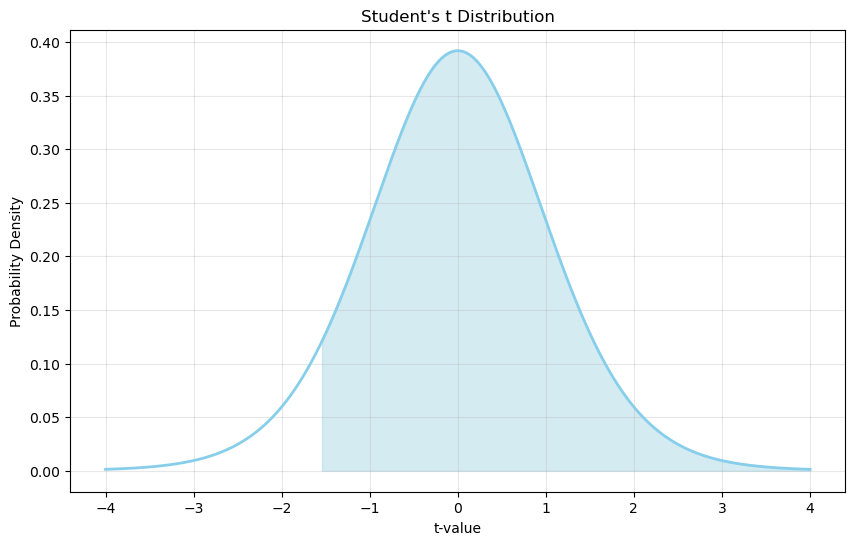

In [8]:
x = np.linspace(-4, 4, 1000)
pdf = t.pdf(x, degrees_of_freedom)

#Graph 
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("Student's t Distribution")
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.fill_between(x, pdf, where=(x >= t_score), color='lightblue', alpha=0.5)
plt.show()

## Long-Tailed Distribution 

In a network analysis project, you are tasked with analyzing internet traffic data. You suspect that the distribution of visits to web pages follows a long-tailed distribution. How would you quantify and characterize this distribution, and what implications might it have for your analysis?

Pareto Distribution Parameters:
Shape parameter (α): 2.350882537287796
Scale parameter (x_min): 0.8622297703233235


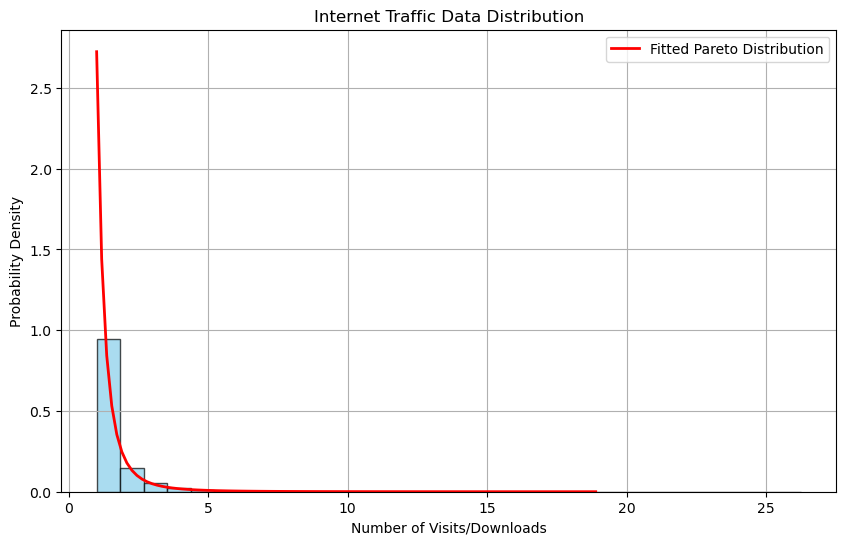

In [9]:
from scipy.stats import pareto

# Step 1: Simulate internet traffic data following a long-tailed distribution
# Generate random data following a Pareto distribution
np.random.seed(0)  # for reproducibility
data = pareto.rvs(b=2.62, size=1000)  # Adjust shape parameter for your data

# Step 2: Data Analysis
# Plot histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Internet Traffic Data Distribution')
plt.xlabel('Number of Visits/Downloads')
plt.ylabel('Probability Density')
plt.grid(True)

# Step 3: Fit a Long-Tailed Distribution
# Fit a Pareto distribution to the data
shape, loc, scale = pareto.fit(data)

# Step 4: Characterization
print("Pareto Distribution Parameters:")
print("Shape parameter (α):", shape)
print("Scale parameter (x_min):", scale)

# Plot the fitted distribution
x = np.linspace(pareto.ppf(0.001, shape), pareto.ppf(0.999, shape), 100)
plt.plot(x, pareto.pdf(x, shape, loc, scale), 'r-', lw=2, label='Fitted Pareto Distribution')

plt.legend()
plt.show()

## Exponential Distribution 

A company wants to simulate the inter-arrival times of customers at a service counter using an exponential distribution. This can help the company analyze customer flow patterns and optimize staffing levels to minimize wait times.

In [15]:
arrival_rate = 0.1
num_customers = 1000

inter_arrival_times = np.random.exponential(scale=1/arrival_rate, size=num_customers)

arrival_times = np.cumsum(inter_arrival_times)

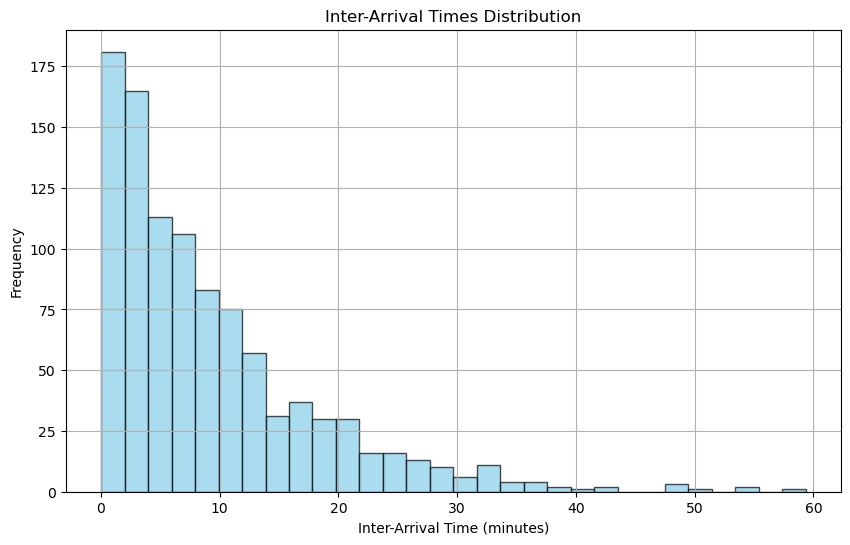

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(inter_arrival_times, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Inter-Arrival Times Distribution')
plt.xlabel('Inter-Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Uniform Distribution

A company wants to **simulate the arrival times of customers** at a store with a uniform distribution to **optimize staffing levels**. The company wants to determine the best number of staff to have on duty during different hours of the day to minimize wait times for customers while also optimizing labor costs.

In [12]:
num_customers = 1000
min_arrival_time = 0
max_arrival_time = 60

arrival_times = np.random.uniform(min_arrival_time, max_arrival_time, num_customers)

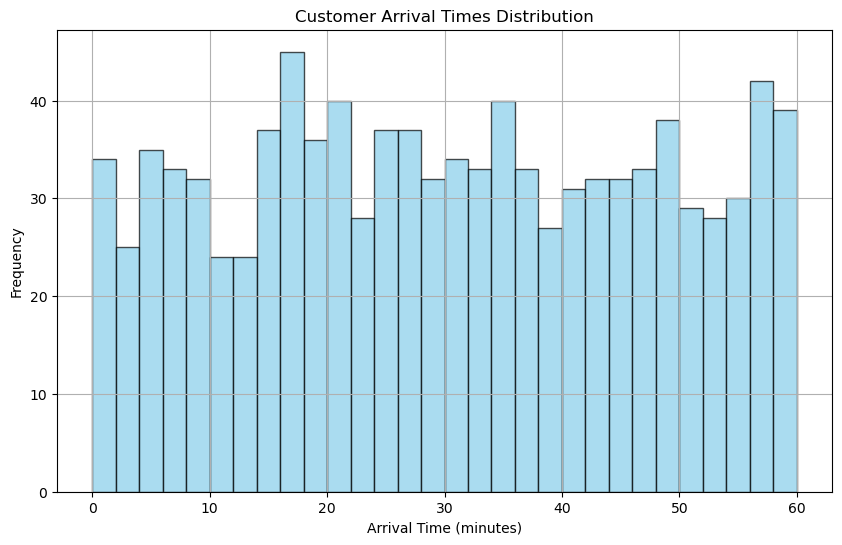

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(arrival_times, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Customer Arrival Times Distribution')
plt.xlabel('Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Bioniomal Distribution

A call center receives an average of 100 customer service calls per hour during peak hours. Based on historical data, it is observed that **30%** of these calls result in a customer **requesting a refund** due to dissatisfaction with the service. 

What is the **probability** that exactly **25 out of 80** randomly selected calls during peak hours will result in a customer requesting a **refund**?

In [22]:
from scipy.stats import binom

In [19]:
n = 80
p = 0.3

k = 25

x = np.arange(0, n+1)

In [23]:
probability = binom.pmf(k, n, p)

print("Probability that exactly 25 out of 80 randomly selected calls result in a refund:")
print("Probability =", probability)

Probability that exactly 25 out of 80 randomly selected calls result in a refund:
Probability = 0.09307325474192697


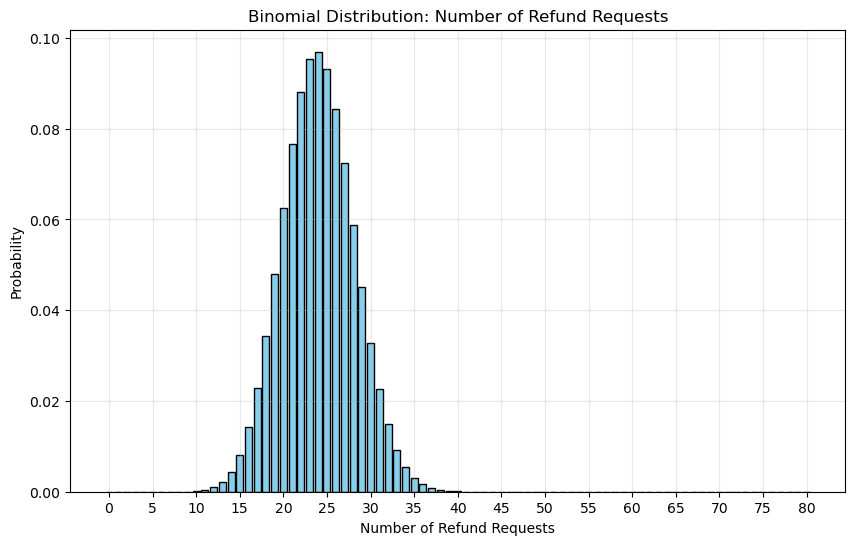

In [24]:
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Binomial Distribution: Number of Refund Requests')
plt.xlabel('Number of Refund Requests')
plt.ylabel('Probability')
plt.xticks(np.arange(0, n+1, 5))
plt.grid(True, alpha=0.3)
plt.show()

## Poisson Distribution

In [25]:
from scipy.stats import poisson

A bakery receives an **average of 50 online orders per day** for their specialty cakes. The bakery uses a Poisson distribution to model the number of orders they receive.

What is the **probability** that the bakery will receive exactly **60 online orders tomorrow**?

In [26]:
average_orders_per_day = 50

number_of_orders_tomorrow = 60

x = np.arange(0, 101)

In [27]:
probability = poisson.pmf(number_of_orders_tomorrow, average_orders_per_day)

print("Probability of receiving exactly 60 online orders tomorrow:")
print("Probability =", probability)

Probability of receiving exactly 60 online orders tomorrow:
Probability = 0.020104872145675377


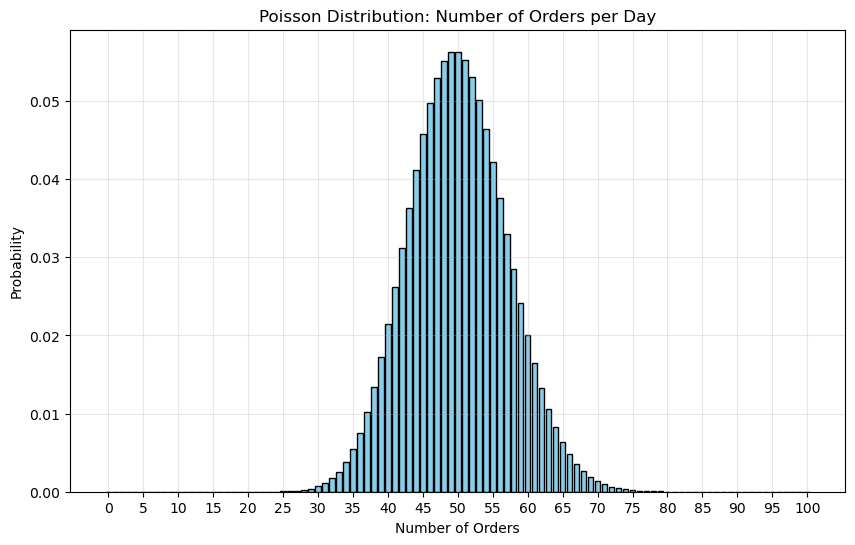

In [28]:
pmf = poisson.pmf(x, average_orders_per_day)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution: Number of Orders per Day')
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True, alpha=0.3)
plt.show()

## Chi-Square Distribution (LB)

A quality control manager at a manufacturing plant is testing the consistency of product packaging. The manager selects a **random sample of 100 packaged products** and measures the weight of each package. The **standard weight** for each package should be **500 grams**. Based on the sample, the manager wants to determine if there is a **significant difference between the observed weights and the standard weight**.

Is there **sufficient evidence** to conclude that the **variability in package weights differs from the standard weight of 500 grams**?

In [29]:
from scipy.stats import chi2

In [31]:
observed_weights = np.random.normal(500, 10, 100)

standard_weight = 500

chi_square_statistic = np.sum(((observed_weights - standard_weight) ** 2) / standard_weight)

degrees_of_freedom = len(observed_weights) - 1

x = np.linspace(0, 50, 1000)

df = degrees_of_freedom

In [32]:
probability = chi2.sf(chi_square_statistic, degrees_of_freedom)

print("Chi-square statistic:", chi_square_statistic)
print("Probability:", probability)

Chi-square statistic: 21.44400268799557
Probability: 1.0


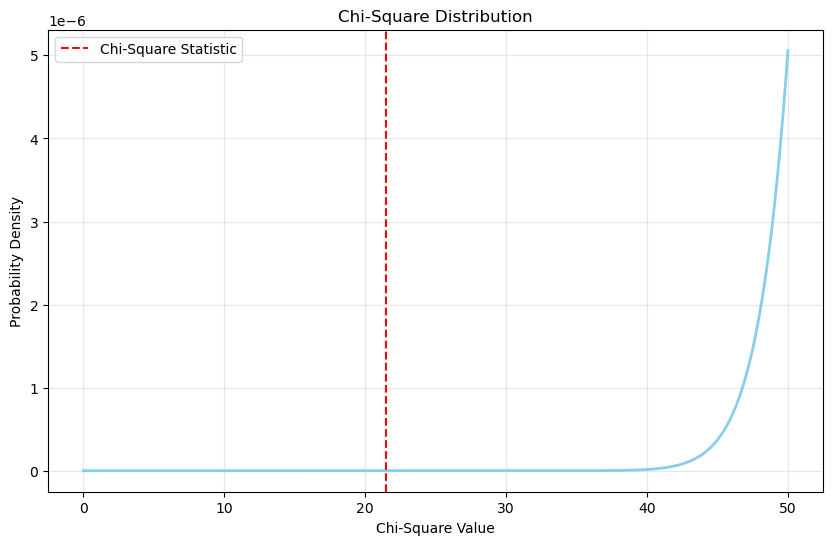

In [33]:
pdf = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("Chi-Square Distribution")
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=chi_square_statistic, color='red', linestyle='--', label='Chi-Square Statistic')
plt.legend()
plt.show()

## F Distribution (LB)

An investment company is comparing the performance of two different investment strategies. They collect the returns from each strategy over a period of time and want to determine if one strategy consistently outperforms the other in terms of variance.

For Strategy A, they calculate a **sample variance of 16, based on 10 observations**. For Strategy B, they calculate a **sample variance of 25, based on 12 observations**.

Is there **sufficient evidence** to conclude that the **variance of returns for Strategy A is different from the variance of returns for Strategy B**?

In [34]:
from scipy.stats import f

In [35]:
variance_a = 16
variance_b = 25

n_a = 10
n_b = 12

f_statistic = variance_a / variance_b

degrees_of_freedom_a = n_a - 1
degrees_of_freedom_b = n_b - 1

x = np.linspace(0.01, 10, 1000)

dfn = degrees_of_freedom_a
dfd = degrees_of_freedom_b

In [36]:
probability = f.cdf(f_statistic, degrees_of_freedom_a, degrees_of_freedom_b)

print("F-statistic:", f_statistic)
print("Probability:", probability)

F-statistic: 0.64
Probability: 0.2560301538914467


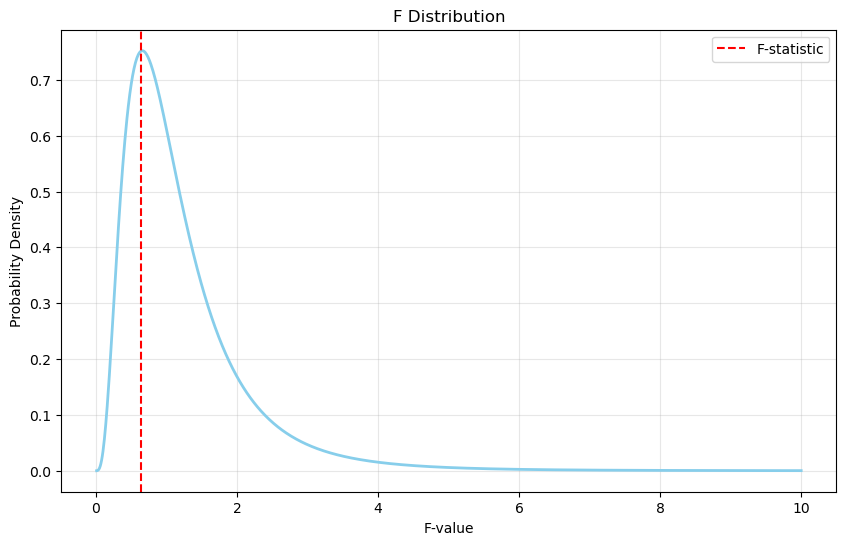

In [37]:
pdf = f.pdf(x, dfn, dfd)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='skyblue', linewidth=2)
plt.title("F Distribution")
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.axvline(x=f_statistic, color='red', linestyle='--', label='F-statistic')
plt.legend()
plt.show()